In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import nltk

In [2]:
# Reading in the data.
df = pd.read_csv("JOB APPLICANTS.csv", encoding='latin-1') 
df.head()

,Candidate Id,Location,Current Annual Salary,Current Salary Currency,Current Salary Type,Expected Annual Salary,Expected Salary Currency,Total Experience in years,Current Industry,Current Fuction,Relocation Cities,Notice Period in days,Current Job Title,Data Source
0,A13380,NCR,NaN,NaN,ANNUAL,60.0,INR,9.00,"Banking,Financial Services,Broking",NaN,NaN,NaN,Team Manager Insurance,INDEED.COM
1,A9339,Vadodara,8.0,INR,ANNUAL,8.0,INR,3.00,Energy and Utilities | Telecommunications#Manu...,Business Development#Manufacturing#Project Man...,NaN,30.0,Marketing Executive,INTERNAL DATABASE
2,A10220,Noida,11.0,INR,ANNUAL,11.0,INR,0.70,IT | Computer Software#Manufacturing | Mechani...,IT Software,NaN,90.0,Software Developer,INTERNAL DATABASE
3,A8162,Hyderabad,8.0,INR,ANNUAL,8.0,INR,3.84,"IT | Information Services, IT | Computer Software","Business Development, IT Software",NaN,90.0,Senior systems engineer,LINKEDIN
4,A13729,Hyderabad,9.6,NaN,ANNUAL,11.0,INR,2.50,IT | Computer Software,IT Software#Research,NaN,30.0,Software Developer,LINKEDIN


## Data exploration

In [3]:
# Checking variables and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Candidate Id               7006 non-null   object 
 1   Location                   6924 non-null   object 
 2   Current Annual Salary      5319 non-null   float64
 3   Current Salary Currency    3601 non-null   object 
 4   Current Salary Type        7005 non-null   object 
 5   Expected Annual Salary     5891 non-null   float64
 6   Expected Salary Currency   6429 non-null   object 
 7   Total Experience in years  6480 non-null   float64
 8   Current Industry           7006 non-null   object 
 9   Current Fuction            5763 non-null   object 
 10  Relocation Cities          202 non-null    object 
 11  Notice Period in days      4154 non-null   float64
 12  Current Job Title          6564 non-null   object 
 13  Data Source                7006 non-null   objec

In [4]:
# Checking null values
df.isnull().sum()

Candidate Id                    0
Location                       82
Current Annual Salary        1687
Current Salary Currency      3405
Current Salary Type             1
Expected Annual Salary       1115
Expected Salary Currency      577
Total Experience in years     526
Current Industry                0
Current Fuction              1243
Relocation Cities            6804
Notice Period in days        2852
Current Job Title             442
Data Source                     0
dtype: int64

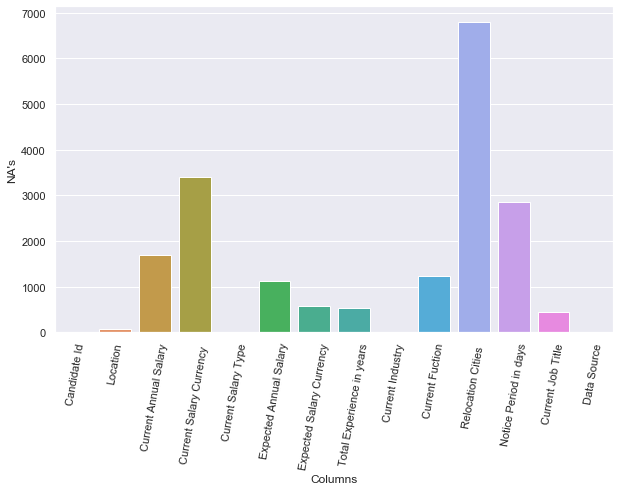

In [5]:
# Visualize missing values

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = df.columns
y = df.isnull().sum()
plt.figure(figsize=(10,6))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
ax.set_xlabel("Columns")
ax.set_ylabel("NA's")
plt.xticks(rotation=80)

plt.show()

Relocation cities has the most missing values, followed by current annual salary.

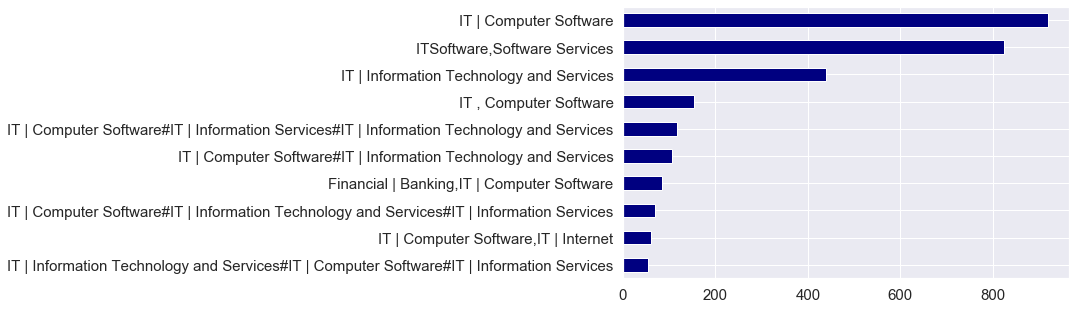

In [6]:
# Checking popular industries the job applicants are currently in.
df['Current Industry'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()


- Most applicants are from the IT| Computer Software

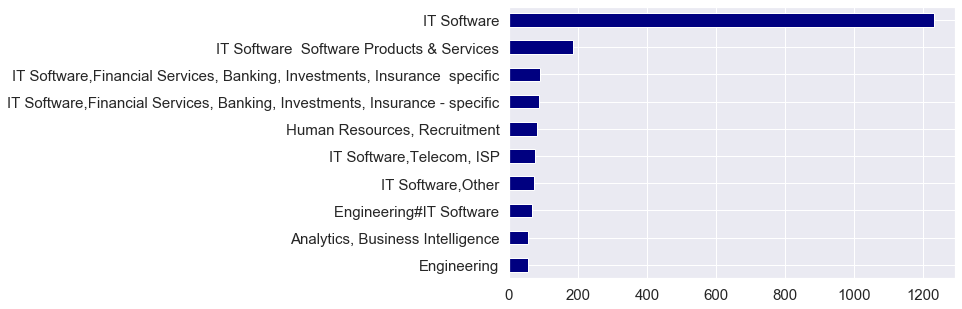

In [7]:
df['Current Fuction'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()

- Most applicants were in the IT|Software department in the companies that they worked previously

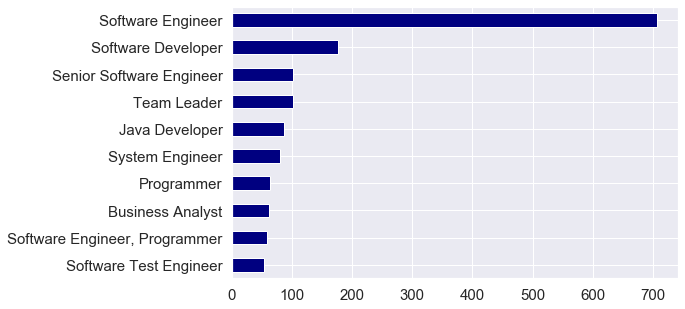

In [8]:
df['Current Job Title'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()

- Most of the applicants have the title Software engineer

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

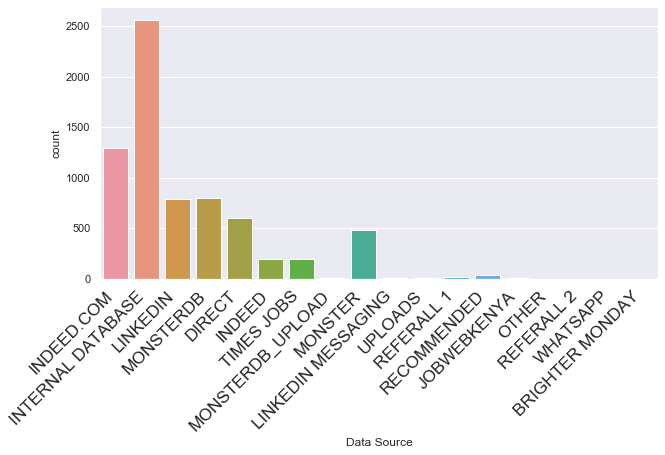

In [9]:
# Plot to see how the job data source
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='Data Source'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

- The company received most job appications from indeed.com

In [10]:
# Selecting the necessary columns
cols = ['Candidate Id']+['Location']+['Current Industry']+['Current Fuction']+['Current Job Title']
df =df[cols]
df.head()

,Candidate Id,Location,Current Industry,Current Fuction,Current Job Title
0,A13380,NCR,"Banking,Financial Services,Broking",NaN,Team Manager Insurance
1,A9339,Vadodara,Energy and Utilities | Telecommunications#Manu...,Business Development#Manufacturing#Project Man...,Marketing Executive
2,A10220,Noida,IT | Computer Software#Manufacturing | Mechani...,IT Software,Software Developer
3,A8162,Hyderabad,"IT | Information Services, IT | Computer Software","Business Development, IT Software",Senior systems engineer
4,A13729,Hyderabad,IT | Computer Software,IT Software#Research,Software Developer


In [11]:
# Text corpus creation.

df= df.fillna(" ")

In [12]:
df["text"] = df["Location"].map(str) + " " + df["Current Industry"] +" "+ df["Current Fuction"]+ " "+df['Current Job Title']
df.head(2)

,Candidate Id,Location,Current Industry,Current Fuction,Current Job Title,text
0,A13380,NCR,"Banking,Financial Services,Broking",,Team Manager Insurance,"NCR Banking,Financial Services,Broking Team ..."
1,A9339,Vadodara,Energy and Utilities | Telecommunications#Manu...,Business Development#Manufacturing#Project Man...,Marketing Executive,Vadodara Energy and Utilities | Telecommunicat...


In [13]:
# Selecting the required columns
df_all = df[["Candidate Id", "text"]]
df_all.head()

,Candidate Id,text
0,A13380,"NCR Banking,Financial Services,Broking Team ..."
1,A9339,Vadodara Energy and Utilities | Telecommunicat...
2,A10220,Noida IT | Computer Software#Manufacturing | M...
3,A8162,"Hyderabad IT | Information Services, IT | Comp..."
4,A13729,Hyderabad IT | Computer Software IT Software#R...


In [14]:
# Loading jobs dataset.
fd = pd.read_csv("jobs all.csv", encoding="latin_1")
fd.head()

,Job Id,Job Title,Keywords,Minimum Experience in years,Maximum Experience in Years,Minimum Annual Salary,Maximum Annual Salary,Currency,Must Haves,Company Name,Founded Year,Employee Count,Job Location,Industry,Function,Required Education (UG),Required Education (PG),Notice Period (Days)
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",2,5,6,15,INR,NaN,Company X,2011,362,Hyderabad,IT | Computer Software,IT Software,B.Tech/B.E.,NaN,60
1,481,Senior Java Engineer/Tech Lead,"J2EE,Java,Hibernate,Webervices,REST Services,S...",7,10,10,15,INR,Should have proficient Java server side progra...,Company X,2011,362,Hyderabad,IT | Computer Software,IT Software,Other UG,Not Required,30
2,839,Front End Developer,NaN,2,5,4,8,INR,The candidate must have at least 2 years of so...,Company X,2011,362,Bengaluru/Bangalore,IT | Information Technology and Services,IT Software,Undergraduate (engineering),NaN,30
3,723,Application Developer,"c#, asp.net, sql, java, html5",3,8,4,9,INR,The Application Developer is a role within the...,Company X,2011,362,Bengaluru,IT | Information Technology and Services,IT Software,B.Tech/B.E.,NaN,30


In [15]:
# Creating text corpus for jobs dataset
cols = ['Job Id']+['Job Title']+['Keywords']+['Job Location']+['Industry']+["Function"]+["Required Education (PG)"]
fd =fd[cols]
fd.head()

,Job Id,Job Title,Keywords,Job Location,Industry,Function,Required Education (PG)
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",Hyderabad,IT | Computer Software,IT Software,NaN
1,481,Senior Java Engineer/Tech Lead,"J2EE,Java,Hibernate,Webervices,REST Services,S...",Hyderabad,IT | Computer Software,IT Software,Not Required
2,839,Front End Developer,NaN,Bengaluru/Bangalore,IT | Information Technology and Services,IT Software,NaN
3,723,Application Developer,"c#, asp.net, sql, java, html5",Bengaluru,IT | Information Technology and Services,IT Software,NaN


In [16]:
fd= fd.fillna(" ")

In [17]:
fd["text_job"] = fd['Job Title'].map(str) + " " + fd['Keywords']+ " "+fd['Job Location']+ " "+fd['Industry']+ " "+fd["Function"]+ " "+fd["Required Education (PG)"]
fd.head(2)

,Job Id,Job Title,Keywords,Job Location,Industry,Function,Required Education (PG),text_job
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",Hyderabad,IT | Computer Software,IT Software,,"Full stack engineer java,Angular,Jquery,j2ee,m..."
1,481,Senior Java Engineer/Tech Lead,"J2EE,Java,Hibernate,Webervices,REST Services,S...",Hyderabad,IT | Computer Software,IT Software,Not Required,"Senior Java Engineer/Tech Lead J2EE,Java,Hiber..."


In [18]:
# Selecting required columns
fd_all = fd[["Job Id", "text_job"]]

In [19]:
fd_all

,Job Id,text_job
0,194,"Full stack engineer java,Angular,Jquery,j2ee,m..."
1,481,"Senior Java Engineer/Tech Lead J2EE,Java,Hiber..."
2,839,Front End Developer Bengaluru/Bangalore IT |...
3,723,"Application Developer c#, asp.net, sql, java, ..."


In [20]:
# Editting columns and joining editted jobs and candidates dataset
fd_all = fd_all.rename(columns={'Job Id': 'Candidate Id', 'text_job': 'text'})
df_final = pd.concat([df_all, fd_all])
df_final.reset_index(inplace=True, drop=True) 

In [21]:
# Viewing the final dataset
df_final.tail()

,Candidate Id,text
7005,A11843,Bengaluru IT | Computer Software IT Software S...
7006,194,"Full stack engineer java,Angular,Jquery,j2ee,m..."
7007,481,"Senior Java Engineer/Tech Lead J2EE,Java,Hiber..."
7008,839,Front End Developer Bengaluru/Bangalore IT |...
7009,723,"Application Developer c#, asp.net, sql, java, ..."


In [22]:
# Downloading nltk libaries
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')


# Text processing

In [23]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text) 
    text = text.replace("nbsp", "")
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [24]:
df_final['text'] = df_final['text'].apply(clean_txt) 

In [25]:
df_final.to_csv("df_final.csv", index = False)

In [26]:
# Viewing the dataframe with the processed text
df_final.head()

,Candidate Id,text
0,A13380,ncr bank financial service broking team manage...
1,A9339,vadodara energy utilities telecommunications m...
2,A10220,noida computer software manufacture mechanical...
3,A8162,hyderabad information service computer softwar...
4,A13729,hyderabad computer software software research ...


# Building recommender system

In [27]:
def cos_sim_recommend(candidate_id):
    from sklearn.feature_extraction.text import CountVectorizer
    df_final = pd.read_csv("df_final.csv")
    count_vect = CountVectorizer()
    counts = count_vect.fit_transform(df_final["text"])
    from sklearn.metrics.pairwise import cosine_similarity
    cosine_sim = cosine_similarity(counts, counts)
    recommended_candidates = []
    indices = pd.Series(df_final['Candidate Id'])
    idx = indices[indices == candidate_id].index[0]   # to get the index of the job title matching the candidate
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_indices = list(score_series.iloc[1:10].index)
    
    for i in top_indices:   # to append the candidates whos profil matches the job.
        recommended_candidates.append(df_final['Candidate Id'][i])
        
    return recommended_candidates

In [28]:
# Full stack engineer.
# Obtaining top 10 candidates recommended for the Full stack engineer job 
cos_sim_recommend("194")

['A12828',
 'A13064',
 'A14020',
 'A13824',
 'A7606',
 'A13719',
 'A7511',
 'A13272',
 'A13067']

In [29]:
# Senior Java Engineer/Tech Lead 
# Obtaining top 10 candidates recommended for the Senior Java Engineer/Tech Lead job 
cos_sim_recommend("481")

['A14020',
 'A12711',
 'A12296',
 'A12708',
 'A13089',
 'A11716',
 'A8284',
 'A13746',
 'A13896']

In [30]:
# Front End Developer 
# Obtaining top 10 candidates recommended for the  Front End Developer job
cos_sim_recommend("839")

['A13926',
 'A14253',
 'A14278',
 'A13938',
 'A14254',
 'A14362',
 'A14212',
 'A14043',
 'A8740']

In [31]:
# Application Developer 
# Obtaining top 10 candidates recommended for the  Application Developer job
cos_sim_recommend("723")

['A12227',
 'A11236',
 'A13715',
 'A11250',
 'A12478',
 'A12537',
 'A11642',
 'A12162',
 'A13988']